In [1]:
import tensorflow as tf
from tensorflow import keras

2024-07-29 09:21:42.962562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full), (x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_valid,x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

O formato de matriz de peso depende do número de entradas. Por isso, recomenda-se especificar a input_shape quando se cria a primeira camada em um modelo Sequentia. Contudo, se você não especificar o formato da entrada, não em problema: a Keras simplesmente aguardará até saber o formato da entrada, antes de crair o modelo. Isso acontecerá quando vocẽ o alimentar com dados reais (por exemplo, durante o treinamento) ou quando você chamar o método build(). até que o modelo seja de fato construído, as camadas não terão pesos e voce não poderá fazer determinadas coisas (como exibir o sumário do modelo ou salvar o modelo). Assim, se você conhece o formato da entrada ao crair o modelo, é melhor especificá-lo.

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(len(class_names),activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2024-07-29 09:21:45.105197: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## pagina 233

usamos __sparse_categorical_cross_entropy__ porque temos rótulos esparsos (ou seja, para cada instância, existe somente um índice de classe-alvo de 0 a 0 nesse caso), e as classes são exclusivas.

ao usar o otimizador __SGD__ é importante acertar a taxa de aprendizado. Em geral, você quer usar o optimizer = keras.optimizers.SGD(lr=??) para definir a taxa de aprendizado. em vez de o optimizer='sgd' cujo padrão é lr=.01

In [7]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 27s 15ms/step - loss: 0.7360 - accuracy: 0.7567 - val_loss: 0.5133 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.4914 - accuracy: 0.8299 - val_loss: 0.4627 - val_accuracy: 0.8430
Epoch 3/30
1719/1719 [==============================] - 32s 18ms/step - loss: 0.4450 - accuracy: 0.8428 - val_loss: 0.4363 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4177 - accuracy: 0.8541 - val_loss: 0.4072 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3968 - accuracy: 0.8611 - val_loss: 0.3790 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 27s 15ms/step - loss: 0.3809 - accuracy: 0.8661 - val_loss: 0.4381 - val_accuracy: 0.8472
Epoch 7/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3672 - accuracy: 0.8715 - val_loss: 0.3709 -

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

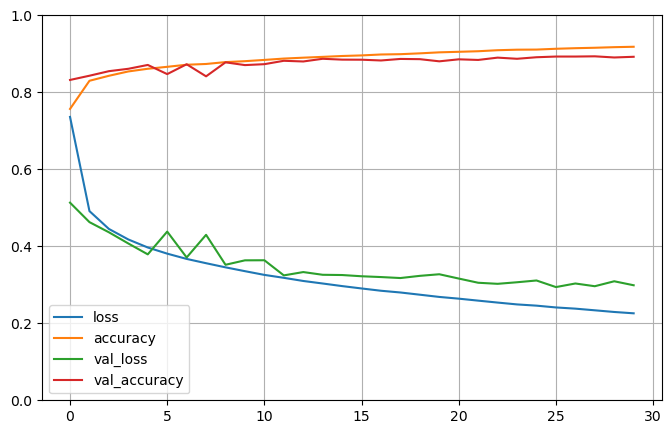

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 54.9884 - accuracy: 0.8624


[54.98836135864258, 0.8623999953269958]

## fazendo predição

In [11]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model.save('classifier.h5')